# Análisis y procesamiento de señales - Trabajo semanal Nº3
# Aramayo Yohana Valentina #

Tal como indica el enunciado de esta tarea, en esta ts3 simularemos el bloque de cuantización de un ADC de B bits en un rango de ±VF Volts. Vamos a completar la simulación del ADC incluyendo la capacidad de muestrear a fs Hertz.
Para que una señal pueda ser cuantizada ésta tiene que pasar por una serie de bloques
  
Una señal analógica x(t) puede ser muestreada por un dispositivo en el que la señal pasa por un convertidor analógico digital y se transforma en señal discreta x[n]. 
 
La conversión se realiza de la siguiente manera: sabemos que el voltaje total es de (2*Vf) y que con 2 elevado a la cantidad de bits, tengo cuántos números puedo representar. Como no tengo números infinitos la conversión va a ir avanzando de manera escalonada porque lo que estoy transformando es una magnitud continua. Cuantos más bits tenga el conversor, mayor será la resolución: es decir, se podrán distinguir diferencias más pequeñas en la señal. Con todo lo dicho tenemos que el paso de cuantización (q) es  2*Vf/(2**B). 
Por otro lado, cuando se usa cuantización por redondeo, el error de cuantización e[n] se modela como una variable aleatoria uniforme en el intervalo [−q/2,q/2]. El valor medio del error es 0, y su varianza (que es igual a su potencia si la media es 0) es: σ^2=(q^2)/12
Además, antes de la etapa de muestreo, la señal analógica debe pasar por un filtro antialiasing, cuyo objetivo es evitar ambigüedades en frecuencia. Finalmente,  la secuencia se convierte nuevamente en analógico y(t)  a través de un conversor digital- analógico.


En el análisis y procesamiento de señales es muy importante identificar las fuentes de distorsión de una señal. Algunas de ellas son, por ejemplo, el ruido analógico y el ruido de cuantización. El ruido analógico aparece antes del proceso de cuantización de la señal. Este tipo de ruido puede generar distorsiones en la amplitud y forma de la señal. Se puede producir por diversas causas siendo algunas de ellas las condiciones ambientales, componentes electrónicos o  interferencias de la red eléctrica. Con la intención de simular una señal realista se decidió tener en cuenta los dos tipos de ruidos previamente mencionados. El ruido de cuantización se encuentra estrechamente relacionado con la cantidad de bits del conversor analógico digital. A mayor cantidad de bits disminuye el ruido de cuantización.

En el código se presenta una relación entre las potencias de ruido que está dado por la siguientes ecuación 

pot_ruido_analog = pot_ruido_cuant * kn 
donde  kn representa la escala de la potencia de ruido analógico



# A)

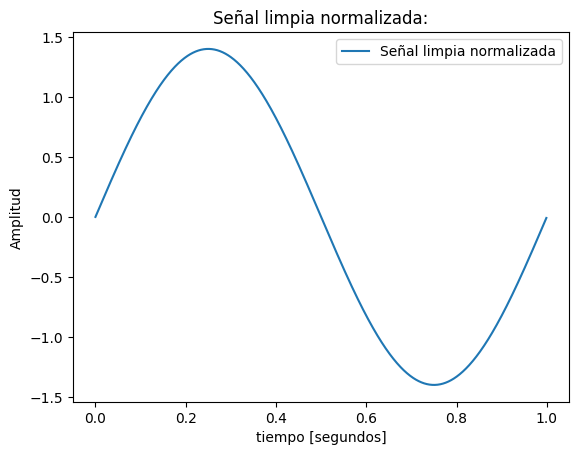

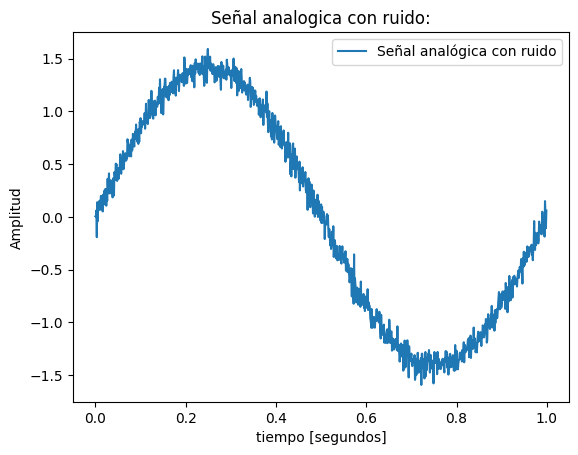

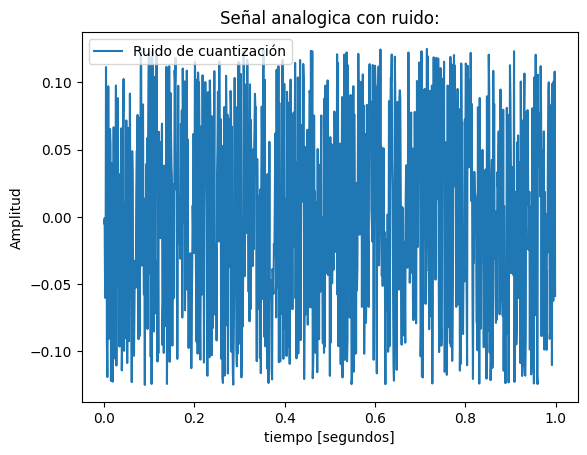

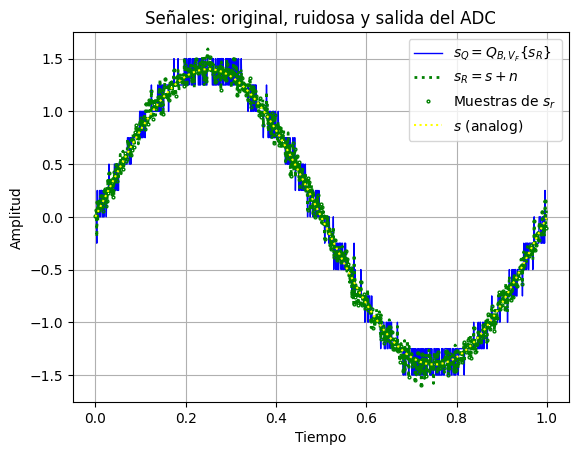

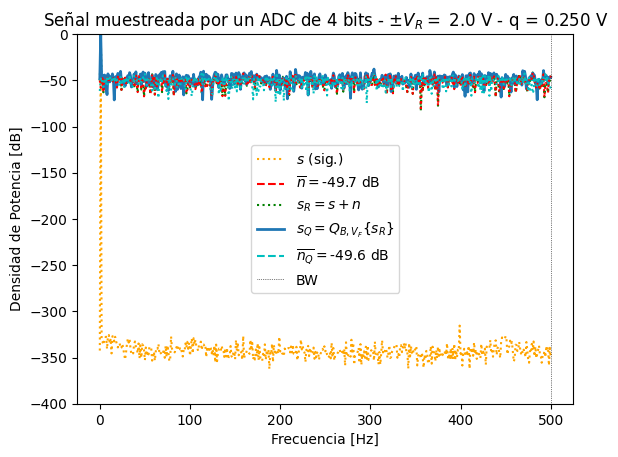

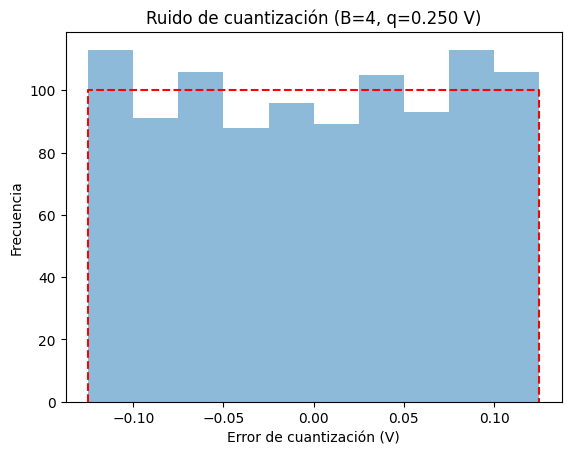

In [9]:
# -*- coding: utf-8 -*- 
"""
Created on Fri Apr  4 12:50:15 2025

@author: Valentina
"""

#%% módulos y funciones a importar

import numpy as np
import matplotlib.pyplot as plt
#import scipy.signal as sig

def mi_funcion_sen (vmax, dc, ff, ph, N, fs):
    #fs frecuencia de muestreo (Hz)
    #N cantidad de muestras
    
    ts = 1/fs # tiempo de muestreo o periodo
    tt=np.linspace (0, (N-1)*ts, N) #vector de tiempo
    
    #generacion de la señal senoidal
    xx= dc + vmax*np.sin(2*np.pi*ff*tt + ph)
    #la señal debe generarse con la formula: x(t)=DC+Vmax*sen(2pift+fase)
    
    return tt, xx

##normalizar para que la potencia sea 1
##uno es viendo la varianza pero no 
tt, xx = mi_funcion_sen(1.4, 0, 1, 0, 1000, 1000)
##print (np.var(xx)) #Imprime la varianza de la funcion
##con desvio estandar:
xn=xx/np.std(xx)

plt.figure(1)
plt.plot(tt,xx, label="Señal limpia normalizada") 
plt.title("Señal limpia normalizada:")
plt.xlabel("tiempo [segundos]")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

#%% Datos de la simulación

fs =  1000 # frecuencia de muestreo (Hz)
N = 1000 # cantidad de muestras
# con 1000 para cada una normalizamos la resolucion espectral

# Datos del ADC
B = 4 # bits 
Vf = 2 # rango simétrico de +/- Vf Volts 
q = 2*Vf/(2**B)# paso de cuantización de q Volts

##1 de ganancia, fijarte el ancho de banda, y la potencia del radio 50 al cuadrado
# datos del ruido (potencia de la señal normalizada, es decir 1 W)
pot_ruido_cuant = q**2/12 # Watts 
kn = 1. # escala de la potencia de ruido analógico
pot_ruido_analog = pot_ruido_cuant * kn # 


ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral
#%% Experimento: 
"""
   Se desea simular el efecto de la cuantización sobre una señal senoidal de 
   frecuencia 1 Hz. La señal "analógica" podría tener añadida una cantidad de 
   ruido gausiano e incorrelado.
   
   Se pide analizar el efecto del muestreo y cuantización sobre la señal 
   analógica. Para ello se proponen una serie de gráficas que tendrá que ayudar
   a construir para luego analizar los resultados.
   
"""

# np.random.normal
# np.random.uniform

nn=np.random.normal(0,np.sqrt(pot_ruido_analog),N) #señal de ruido analogico

# Señales

analog_sig = xn # señal analógica sin ruido

sr = xn+nn # señal analógica de entrada al ADC (con ruido analógico)
plt.figure(2)
plt.plot(tt,sr, label="Señal analógica con ruido")
plt.title("Señal analogica con ruido:")
plt.xlabel("tiempo [segundos]")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

srq = np.round(sr/q)*q# señal cuantizada, (señal divida la cantidad total de bits)
                                 
nq =  srq-sr# señal de ruido de cuantización

plt.figure(3)
plt.plot(tt,nq, label="Ruido de cuantización")
plt.title("Señal analogica con ruido:")
plt.xlabel("tiempo [segundos]")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

#%% Visualización de resultados

# cierro ventanas anteriores
plt.close('all')

##################
# Señal temporal
##################

plt.figure(1)

plt.plot(tt, srq, lw=1, linestyle='-', color='blue', fillstyle='none', label='$ s_Q = Q_{B,V_F}\{s_R\}$' )
# Línea punteada (sin marcadores)
plt.plot(tt, sr, lw=2, color='green', linestyle='dotted', label='$ s_R = s + n $')

# Círculos sin relleno cada N puntos (por ejemplo, cada 10)
plt.plot(tt[::2], sr[::2], marker='o', markersize=2, linestyle='none', markerfacecolor='none', 
         markeredgecolor='green', label='Muestras de $s_r$')
plt.plot(tt, xx, color='yellow', linestyle=':', label='$s$ (analog)')

plt.legend()
plt.grid(True)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señales: original, ruidosa y salida del ADC')
plt.show()


###########
# Espectro
###########

plt.figure(2)
plt.ylim(-400, 0)
ft_SR = 1/N*np.fft.fft( sr)
ft_Srq = 1/N*np.fft.fft( srq)
ft_As = 1/N*np.fft.fft( analog_sig)
ft_Nq = 1/N*np.fft.fft( nq)
ft_Nn = 1/N*np.fft.fft( nn)

# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)

bfrec = ff <= fs/2

Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='orange', ls='dotted', label='$ s $ (sig.)' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 0.5  )

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()

#############
# Histograma
#############

plt.figure(3)
bins = 10
plt.hist(nq.flatten(), bins=bins, alpha=0.5)
e=q*0.5
plt.plot([-e, -e, e, e], [0, N/bins, N/bins, 0], '--r')
plt.title(f'Ruido de cuantización (B={B}, q={q:.3f} V)')
plt.ylabel('Frecuencia')
plt.xlabel('Error de cuantización (V)')
plt.show()


# B) #

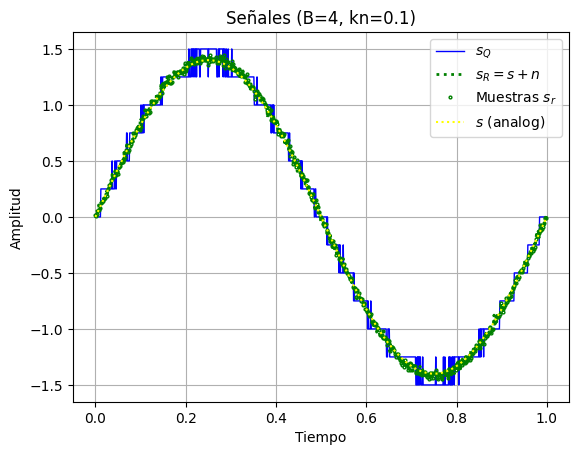

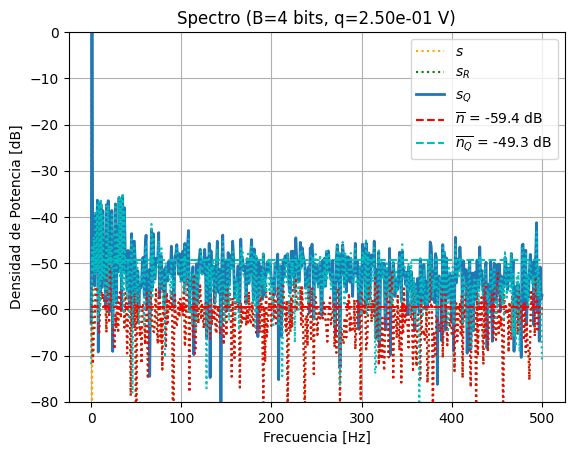

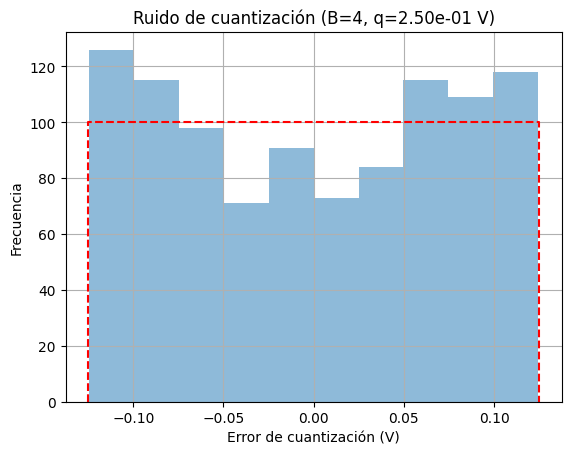

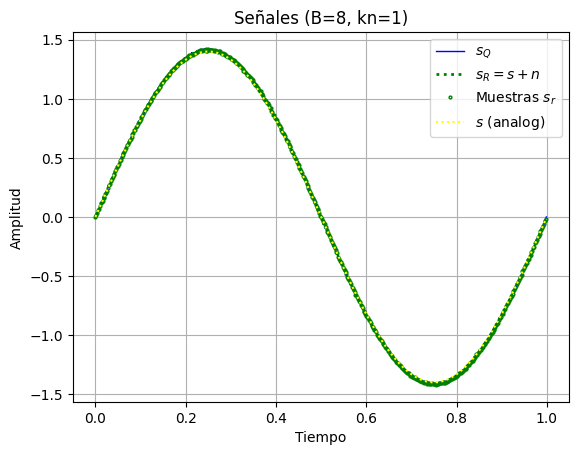

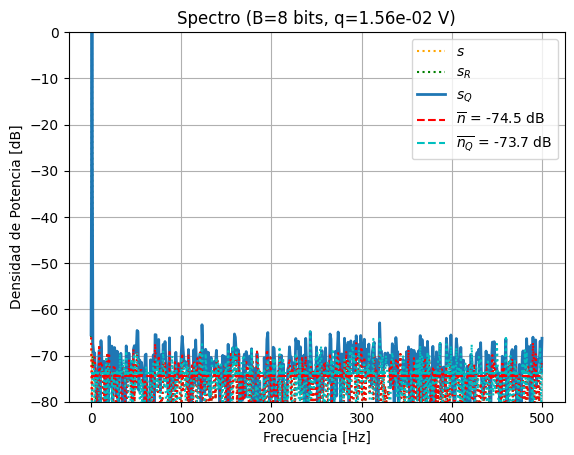

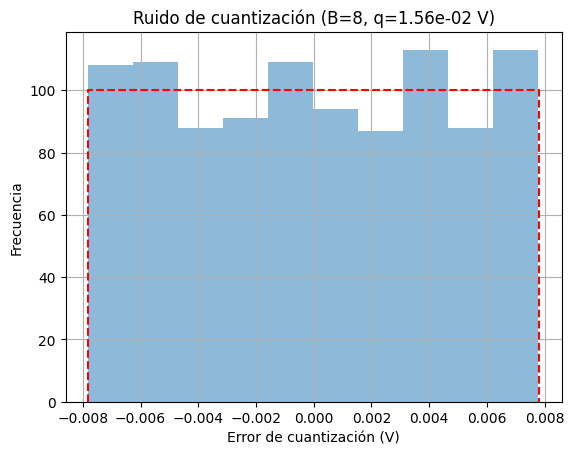

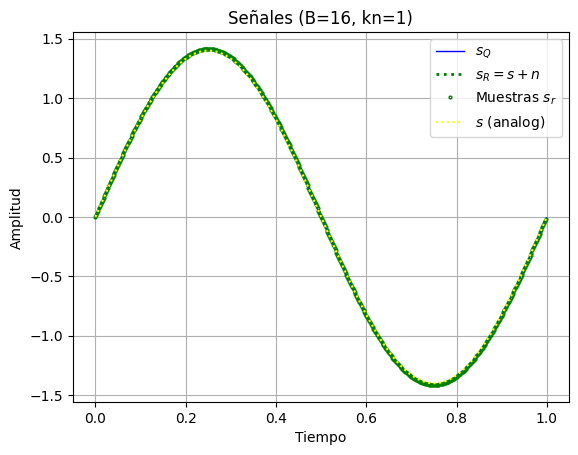

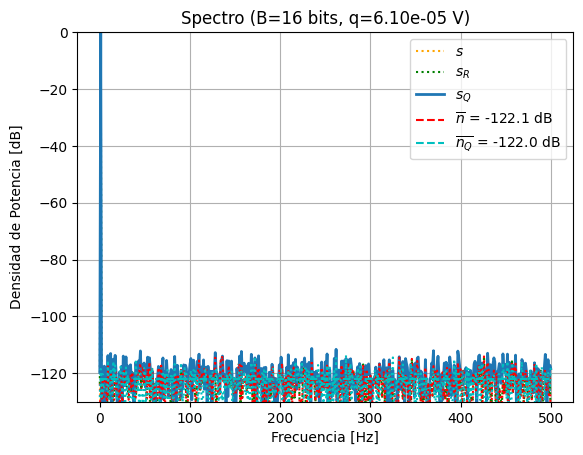

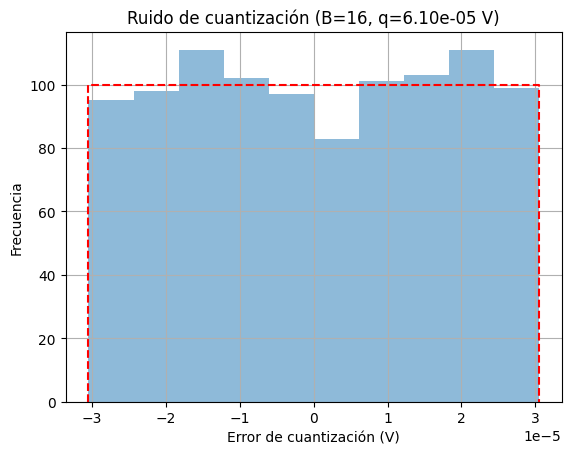

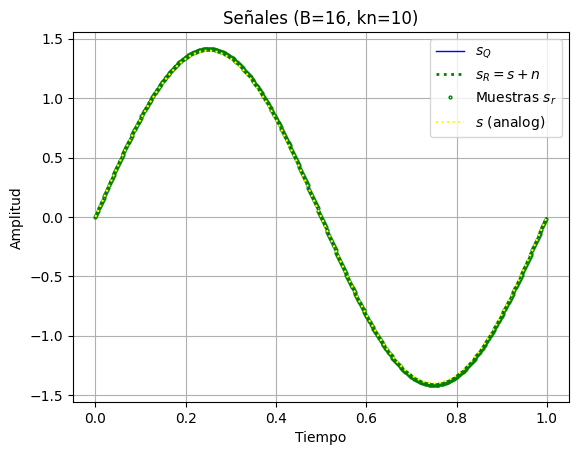

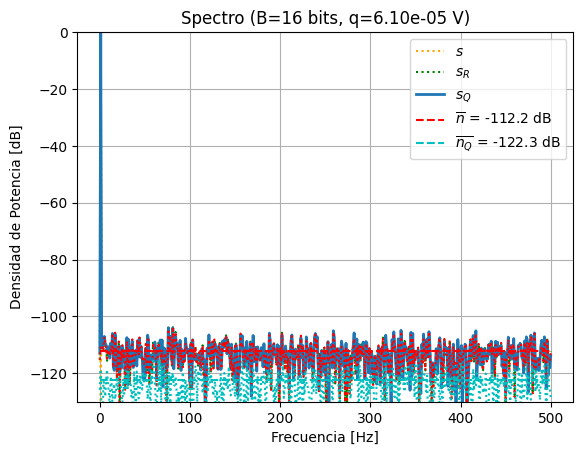

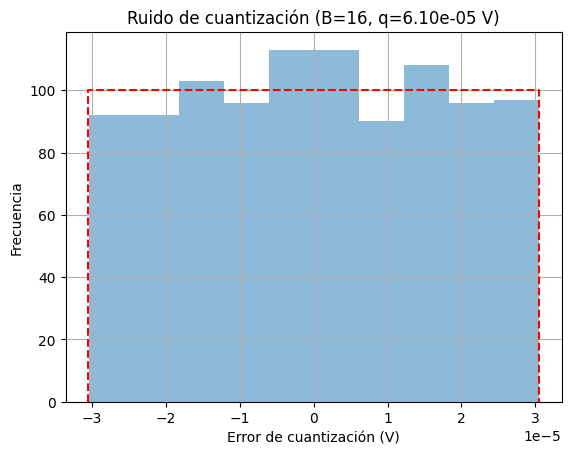

In [10]:
def simular_efecto_cuantizacion(kn, B):
    import numpy as np
    import matplotlib.pyplot as plt

    # Datos de la señal
    fs = 1000  # frecuencia de muestreo (Hz)
    N = 1000   # cantidad de muestras
    Vf = 2     # rango simétrico de +/- Vf Volts 
    q = 2 * Vf / (2 ** B)  # paso de cuantización

    # Potencias del ruido
    pot_ruido_cuant = q**2 / 12
    pot_ruido_analog = pot_ruido_cuant * kn

    # Tiempo
    ts = 1 / fs
    tt = np.linspace(0, (N - 1) * ts, N)

    # Señal senoidal y normalización
    xx = 0 + 1.4 * np.sin(2 * np.pi * 1 * tt + 0)
    xn = xx / np.std(xx)

    # Señal con ruido analógico
    nn = np.random.normal(0, np.sqrt(pot_ruido_analog), N)
    sr = xn + nn

    # Cuantización
    srq = np.round(sr / q) * q
    nq = srq - sr
    analog_sig = xn

    # Espectros
    df = fs / N
    ff = np.linspace(0, (N - 1) * df, N)
    bfrec = ff <= fs / 2

    ft_SR = 1 / N * np.fft.fft(sr)
    ft_Srq = 1 / N * np.fft.fft(srq)
    ft_As = 1 / N * np.fft.fft(analog_sig)
    ft_Nq = 1 / N * np.fft.fft(nq)
    ft_Nn = 1 / N * np.fft.fft(nn)

    Nnq_mean = np.mean(np.abs(ft_Nq) ** 2)
    nNn_mean = np.mean(np.abs(ft_Nn) ** 2)

    # Plot de señales
    plt.figure()
    plt.plot(tt, srq, lw=1, linestyle='-', color='blue', label='$s_Q$')
    plt.plot(tt, sr, lw=2, color='green', linestyle='dotted', label='$s_R = s + n$')
    plt.plot(tt[::2], sr[::2], marker='o', markersize=2, linestyle='none',
             markerfacecolor='none', markeredgecolor='green', label='Muestras $s_r$')
    plt.plot(tt, xx, color='yellow', linestyle=':', label='$s$ (analog)')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.title(f'Señales (B={B}, kn={kn})')
    plt.show()

    # Plot de espectros
    plt.figure()
    if B == 16:
        plt.ylim(-130, 0)
    else:
        plt.ylim(-80, 0)

    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_As[bfrec]) ** 2), color='orange', ls='dotted', label='$s$')
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_SR[bfrec]) ** 2), ':g', label='$s_R$')
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Srq[bfrec]) ** 2), lw=2, label='$s_Q$')
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nn[bfrec]) ** 2), ':r')
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_Nq[bfrec]) ** 2), ':c')

    plt.plot([ff[0], ff[bfrec][-1]], [10 * np.log10(2 * nNn_mean)] * 2,
             '--r', label=f'$\overline{{n}}$ = {10 * np.log10(2 * nNn_mean):.1f} dB')
    plt.plot([ff[0], ff[bfrec][-1]], [10 * np.log10(2 * Nnq_mean)] * 2,
             '--c', label=f'$\overline{{n_Q}}$ = {10 * np.log10(2 * Nnq_mean):.1f} dB')

    plt.title(f'Spectro (B={B} bits, q={q:.2e} V)')
    plt.ylabel('Densidad de Potencia [dB]')
    plt.xlabel('Frecuencia [Hz]')
    plt.legend()
    plt.grid()
    plt.show()

    # Histograma del ruido de cuantización
    plt.figure()
    bins = 10
    plt.hist(nq.flatten(), bins=bins, alpha=0.5)
    e = q * 0.5
    plt.plot([-e, -e, e, e], [0, N / bins, N / bins, 0], '--r')
    plt.title(f'Ruido de cuantización (B={B}, q={q:.2e} V)')
    plt.xlabel('Error de cuantización (V)')
    plt.ylabel('Frecuencia')
    plt.grid()
    plt.show()

# Llamadas a la función con distintos parámetros
simular_efecto_cuantizacion(kn=0.1, B=4)
simular_efecto_cuantizacion(kn=1, B=8)
simular_efecto_cuantizacion(kn=1, B=16)
simular_efecto_cuantizacion(kn=10, B=16)


# Análisis de los resultados obtenidos #
Primero voy a hacer un comentario en general de los gráficos de densidad espectral de potencia y de los histogramas. Luego, haré un análisis más específico para cada caso propuesto.

En los gráficos de densidad espectral de potencia, se observa que la señal senoidal ideal con los parámetros establecidos concentra su potencia en 1 Hz, alcanzando una densidad de 0 dB en esa frecuencia. Esto está en línea con la configuración utilizada, ya que una densidad de 0 dB indica que la potencia en 1 Hz es de 1 watt. Este resultado es coherente, dado que la frecuencia de nuestra señal senoidal es precisamente 1 Hz. 
Teóricamente, esto se representa mediante un delta de Dirac centrado en 1 Hz, ya que una señal senoidal infinita en el tiempo posee toda su potencia concentrada en una sola frecuencia. En la práctica, como la señal es finita y discretizada, este delta se aproxima visualmente mediante un pico muy estrecho en el espectro.
Para el resto de las frecuencias, la densidad de potencia es muy baja, lo que en una escala logarítmica se traduce en valores cercanos a −∞ dB, es decir, una potencia que tiende a 0 watts.

Histogramas

En los histogramas puede observarse una relación directa entre la cantidad de bits del conversor analógico-digital y la distribución del error en cada caso. A medida que aumenta el número de bits, el error de cuantización se reduce y se concentra en torno al valor cero. Es decir, la mayoría de los errores son pequeños. Sin embargo, aunque el aumento de bits disminuye la amplitud del error, no garantiza una distribución uniforme del mismo.
La forma del histograma del error está influenciada por la presencia o ausencia de ruido analógico. Cuando kn=0, la distribución del error pierde la tendencia a ser uniforme. Esto se debe a que, al tratarse de una señal suave y repetitiva, las muestras tienden a ser predecibles y a caer en los mismos niveles del cuantizador, lo que provoca que los errores se concentren en ciertos valores. Este fenómeno se conoce como correlación del error de cuantización con la señal.
A medida que el parámetro kn aumenta (por ejemplo, en los casos donde kn=1 o kn=10) se observa que la distribución se asemeja más a una distribución uniforme. En otras palabras, si la señal es limpia y repetitiva, el cuantizador actúa de forma similar en cada ciclo, y el error se repite. Si se añade variabilidad mediante ruido, el cuantizador actúa de forma más dispersa, y el error deja de estar relacionado con la señal, comportándose de manera más aleatoria.




# Análisis de cada caso #
a) En el caso del punto A la consigna nos pide la cuantización para un conversor de 4 bits con un kn de 1. Para este ensayo obtenemos un paso de cuantización de 0,250V (4V/16=0,250V). Además, notamos que  debido a que kn es igual a 1 la potencia de ruido analógico es igual a la potencia de ruido digital. 
Esto es exactamente lo que se refleja en el gráfico de densidad de potencia donde se observa que ambos ruidos se encuentran aproximadamente al mismo nivel (alrededor de -50db). 
Del mismo gráfico también puede observarse que, aunque el piso de la señal sin ruido está en torno a –70 dB, la señal cuantizada alcanza aproximadamente –50 dB. Esto se debe al efecto combinado del ruido analógico y del ruido de cuantización, que elevan el piso total.
En general, cuando uno de los dos ruidos (analógico o digital) domina sobre el otro, es ese ruido el que determina el piso total del sistema. En otras palabras, la calidad de la señal digitalizada queda limitada por el mayor de los dos ruidos.

Por otro lado, respecto al gráfico de tiempo, se distinguen fácilmente los escalones azules que representan la salida del ADC. Esto se debe a que con solo 4 bits, el número de niveles de cuantización es bajo, y por tanto el efecto escalonado es mucho más visible.

b) 
En este punto tenemos tres casos distintos (yo agregué uno más):
i) k=0,1 y B=4 bits
Para este caso esperamos una cuantización con el mismo paso q que en a. La diferencia principal con el caso anterior está en el valor de kn que ahora es 0,1, es decir, la potencia del ruido analógico es solo un 10% de la potencia del ruido de cuantización. Ahora bien, si representamos esa relación en escala logarítmica (dB), aplicamos:
dB=10⋅log⁡10(kn)=10⋅log⁡10(0,1)=−10dB
Por eso, el piso de ruido analógico será 10 dB más bajo que el de cuantización. 
De todas maneras, como vimos antes la señal cuantizada quedará a nivel del piso de ruido digital (que es el mayor de los dos).


ii) k=1 y B=8 bits 
Para este caso esperamos una cuantización con un paso menor que en a y que en el caso anterior. Para este caso q= 0,016V aproximadamente. Esto indica que nuestra resolución es mayor que antes. Recordemos que el error de cuantización se encuentra estrechamente relacionado con la cantidad de bits del conversor analógico/digital. Además, el error de cuantización sigue una distribución uniforme y la potencia de ruido está dada por la variación de esta distribución. Con lo cual se espera que el piso de ruido digital sea menor que en los casos previos (B= 4 bits). Además, como la relación entre el ruido de cuantización y el ruido analógico es uno a uno, el ruido analógico también desciende. Esto es lo que se ve ilustrado en el gráfico de la densidad espectral de potencia.

Para el caso con 4 bits veíamos que aunque la señal se encontraba a -70db la señal cuantizada quedaba a un piso de -50db, donde se encontraban tanto el ruido analógico como el digital. 
En cambio, con 8 bits, la señal cuantizada se sitúa aproximadamente al mismo nivel que la señal original, lo cual indica que el proceso de cuantización introduce muy poco error. Se logra así una representación mucho más fiel.

iii) k=1 y B=16 bits 
Para este caso esperamos una cuantización con un paso menor que en a y que en todos los casos anteriores. Para este caso q=61μV. Esto indica que nuestra resolución es mayor que antes.
Al igual que en el caso ii tenemos que debido al aumento en la cantidad de bits descendió el piso de ruido analógico y debido a que las potencias de ruido analógico y de cuantización son iguales también desciende el analógico. Ambos pisos se encuentran a aproximadamente -122db. 
Por otro lado, respecto al gráfico de la senoidal en el tiempo vemos que los pasos de cuantización de la señal son tan pequeños que empiezan a ser indistinguibles, directamente no se ve el color azul que los indica a menos que se haga zoom en la imagen. Prácticamente no se aprecia la diferencia entre la señal original y la cuantizada: la señal digitalizada representa con gran fidelidad la señal analógica 

iv) k=10 y B=16 bits
Lo que cambia en este gráfico respecto al caso iii es que el piso de ruido digital se encuentra a 10 db por encima del digital. Sabemos que el mayor ruido es que le da el piso final a la señal cuantizada. Justo en este caso, esta distinción no afecta al muestreo de la señal pues un piso de -112 dB muestra una excelente cadena de calidad. Entonces, no afecta significativamente.
